### Data Source:

- https://www.kaggle.com/gregorut/videogamesales?select=vgsales.csv
- https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

In [1]:
# Machine Learning

import sklearn
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score,classification_report,f1_score, make_scorer
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

# Data Viz
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "fantasy"

import bokeh
from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.iris import flowers
from bokeh.transform import factor_cmap, factor_mark
from bokeh.io import output_notebook

In [2]:
main_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
main_df = main_df.replace('tbd', np.nan)
main_df["User_Score"] = main_df.User_Score.astype(float)
main_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fallout_df = main_df[main_df['Name'].str.contains("Fallout", na = False)]
fallout_df_sorted = fallout_df.sort_values(by = ['Name', 'Platform', 'Year_of_Release'])
fallout_df_sorted

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2100,Fallout 3,PC,2008.0,Role-Playing,Bethesda Softworks,0.02,0.88,0.00,0.08,0.98,91.0,48.0,7.9,3450.0,Bethesda Game Studios,M
307,Fallout 3,PS3,2008.0,Role-Playing,Bethesda Softworks,2.15,1.13,0.07,0.59,3.94,90.0,57.0,8.0,910.0,Bethesda Game Studios,M
211,Fallout 3,X360,2008.0,Role-Playing,Bethesda Softworks,3.40,0.99,0.09,0.45,4.93,93.0,84.0,8.5,1655.0,Bethesda Game Studios,M
6921,Fallout 3 Game Add-On Pack: Broken Steel and P...,X360,2009.0,Role-Playing,Bethesda Softworks,0.16,0.06,0.00,0.02,0.24,NaN,NaN,NaN,NaN,Bethesda Softworks,M
10593,Fallout 3 Game Add-On Pack: The Pitt and Opera...,X360,2009.0,Role-Playing,Bethesda Softworks,0.09,0.00,0.00,0.01,0.10,NaN,NaN,NaN,NaN,Bethesda Softworks,M
1530,Fallout 4,PC,2015.0,Role-Playing,Bethesda Softworks,0.51,0.67,0.00,0.10,1.29,84.0,38.0,5.4,7512.0,Bethesda Game Studios,M
105,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.0,58.0,6.5,4228.0,Bethesda Game Studios,M
270,Fallout 4,XOne,2015.0,Role-Playing,Bethesda Softworks,2.51,1.32,0.01,0.38,4.22,88.0,39.0,6.2,1749.0,Bethesda Game Studios,M
16460,Fallout Anthology,PC,2015.0,Action,Bethesda Softworks,0.00,0.01,0.00,0.00,0.01,NaN,NaN,8.3,12.0,Various,NaN
15424,Fallout Trilogy,PC,2004.0,Role-Playing,Ubisoft,0.00,0.02,0.00,0.00,0.02,NaN,NaN,8.9,31.0,Various,M


In [4]:
warcraft_df = main_df[main_df['Name'].str.contains("Warcraft", na = False)]
warcraft_df_sorted = warcraft_df.sort_values(by = ['Name', 'Platform', 'Year_of_Release'])
warcraft_df_sorted

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
273,Warcraft II: Tides of Darkness,PC,1995.0,Strategy,Activision,1.70,2.27,0.0,0.23,4.21,NaN,NaN,NaN,NaN,NaN,NaN
9418,Warcraft III: Reign of Chaos,PC,2002.0,Strategy,Vivendi Games,0.03,0.09,0.0,0.02,0.13,92.0,40.0,9.1,1023.0,Blizzard Entertainment,T
1213,Warcraft III: The Frozen Throne,PC,2003.0,Strategy,Activision,0.58,0.87,0.0,0.09,1.54,88.0,23.0,9.0,713.0,Blizzard Entertainment,T
806,Warcraft: Orcs & Humans,PC,1994.0,Strategy,Activision,0.89,1.08,0.0,0.11,2.08,NaN,NaN,NaN,NaN,NaN,NaN
138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.08,6.21,0.0,0.00,6.29,93.0,57.0,7.3,2182.0,Blizzard Entertainment,T
800,World of Warcraft: Cataclysm,PC,2010.0,Role-Playing,Activision,1.77,0.32,0.0,0.00,2.08,90.0,53.0,5.6,953.0,Blizzard Entertainment,T
5609,World of Warcraft: Legion,PC,2016.0,Role-Playing,Activision,0.13,0.16,0.0,0.03,0.32,88.0,62.0,7.5,535.0,Blizzard Entertainment,T
959,World of Warcraft: Mists of Pandaria,PC,2012.0,Role-Playing,Activision,0.84,0.76,0.0,0.22,1.82,82.0,42.0,4.8,1265.0,Blizzard Entertainment,T
288,World of Warcraft: The Burning Crusade,PC,2007.0,Role-Playing,Activision,2.57,1.52,0.0,0.00,4.09,91.0,46.0,7.9,785.0,Blizzard Entertainment,T
4148,World of Warcraft: Warlords of Draenor,PC,2014.0,Action,Activision Blizzard,0.08,0.36,0.0,0.03,0.47,87.0,49.0,5.9,1154.0,Blizzard Entertainment,T


In [5]:
data_by_devs = main_df.groupby(['Developer']).agg({
    'NA_Sales':'sum',
    'EU_Sales':'sum',
    'JP_Sales':'sum',
    'Other_Sales':'sum',
    'Global_Sales':'sum',
    'Critic_Score':'mean',
    'User_Score':'mean'}).reset_index()
data_by_devs

,Developer,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
0,10tacle Studios,0.15,0.00,0.00,0.01,0.16,37.0,NaN
1,"10tacle Studios, Fusionsphere Systems",0.08,0.02,0.00,0.00,0.11,68.0,7.60
2,"1C, 1C Company",0.00,0.03,0.00,0.00,0.03,88.5,8.70
3,"1C, Ino-Co, 1C Company",0.04,0.00,0.00,0.00,0.05,72.0,7.30
4,"1C, Various, 1C Company",0.00,0.01,0.00,0.00,0.01,NaN,NaN
...,...,...,...,...,...,...,...,...
1691,odenis studio,0.08,0.00,0.00,0.01,0.09,73.0,7.30
1692,oeFun,0.02,0.00,0.00,0.00,0.02,60.0,NaN
1693,puzzle.tv,0.11,0.00,0.00,0.01,0.12,NaN,NaN
1694,syn Sophia,0.78,0.84,1.49,0.19,3.31,74.5,7.85


C:\Users\ericw\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


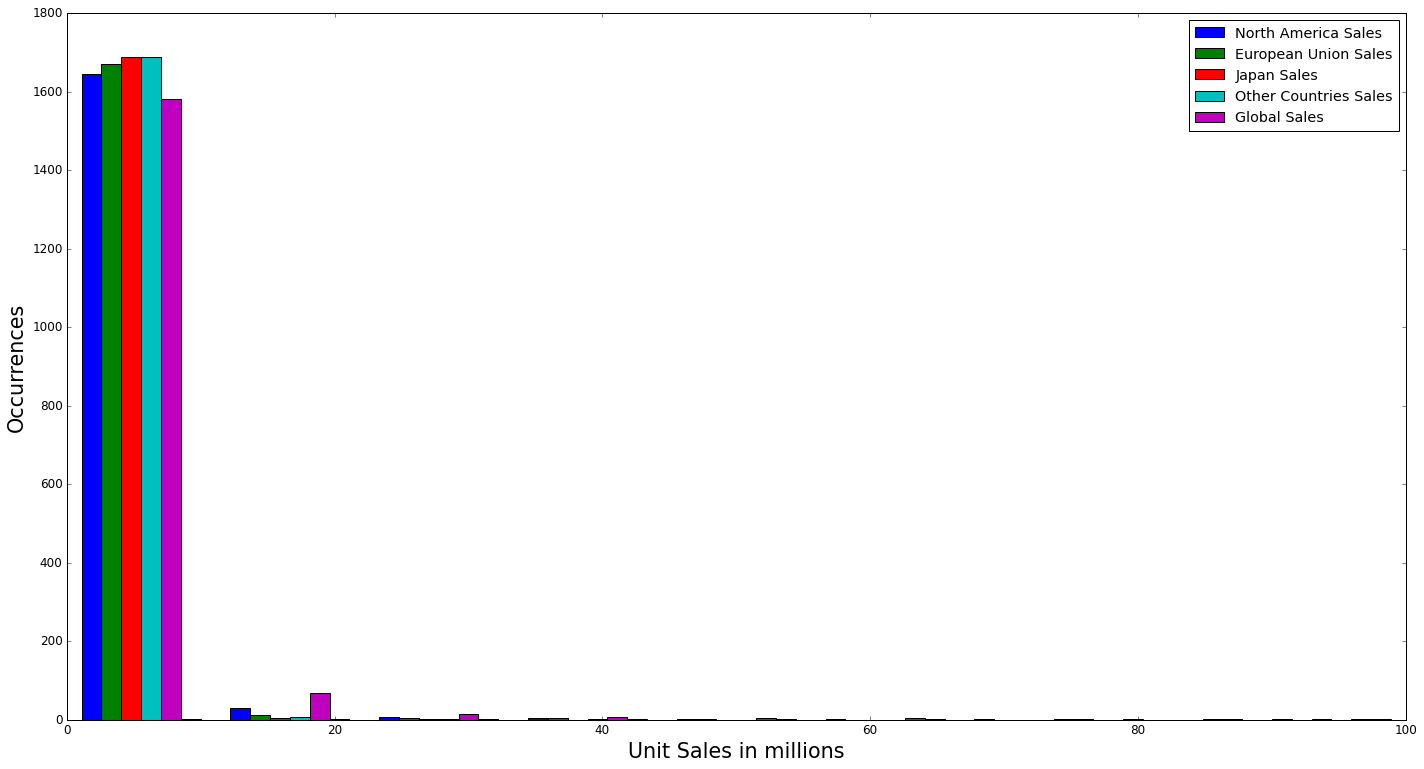

In [6]:
plt.figure(figsize=(24,13))
plt.style.use('classic')

dev_NA_Sales = data_by_devs['NA_Sales']
dev_EU_Sales = data_by_devs['EU_Sales']
dev_JP_Sales = data_by_devs['JP_Sales']
dev_Other_Sales = data_by_devs['Other_Sales']
dev_Global_Sales = data_by_devs['Global_Sales']

bins = np.linspace(0, 100, 10)

plt.hist([dev_NA_Sales, dev_EU_Sales, dev_JP_Sales, dev_Other_Sales, dev_Global_Sales, bins], bins, 
         label=['North America Sales', 
                'European Union Sales', 
                'Japan Sales', 
                'Other Countries Sales', 
                'Global Sales'])
plt.legend(loc='upper right')
plt.xlabel("Unit Sales in millions", fontsize = "xx-large")
plt.ylabel("Occurrences", fontsize = "xx-large")
plt.show()

In [7]:
data_by_devs

,Developer,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
0,10tacle Studios,0.15,0.00,0.00,0.01,0.16,37.0,NaN
1,"10tacle Studios, Fusionsphere Systems",0.08,0.02,0.00,0.00,0.11,68.0,7.60
2,"1C, 1C Company",0.00,0.03,0.00,0.00,0.03,88.5,8.70
3,"1C, Ino-Co, 1C Company",0.04,0.00,0.00,0.00,0.05,72.0,7.30
4,"1C, Various, 1C Company",0.00,0.01,0.00,0.00,0.01,NaN,NaN
...,...,...,...,...,...,...,...,...
1691,odenis studio,0.08,0.00,0.00,0.01,0.09,73.0,7.30
1692,oeFun,0.02,0.00,0.00,0.00,0.02,60.0,NaN
1693,puzzle.tv,0.11,0.00,0.00,0.01,0.12,NaN,NaN
1694,syn Sophia,0.78,0.84,1.49,0.19,3.31,74.5,7.85


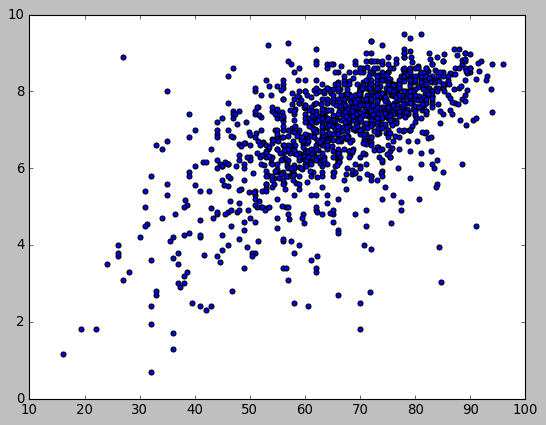

In [8]:
plt.scatter(data_by_devs['Critic_Score'], data_by_devs['User_Score'])
plt.show()

In [9]:
data_by_genre = main_df.groupby(['Genre']).agg({
    'NA_Sales':'sum',
    'EU_Sales':'sum',
    'JP_Sales':'sum',
    'Other_Sales':'sum',
    'Global_Sales':'sum',
    'Critic_Score':'mean',
    'User_Score':'mean'}).reset_index()
data_by_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
0,Action,879.01,519.13,161.44,184.60,1745.27,66.629101,7.054044
1,Adventure,105.26,63.54,52.30,16.49,237.69,65.331269,7.133000
2,Fighting,223.36,100.33,87.48,36.36,447.48,69.217604,7.302506
3,Misc,407.27,212.74,108.11,74.39,803.18,66.619503,6.819362
4,Platform,445.50,200.35,130.83,51.09,828.08,68.058350,7.301402
5,Puzzle,122.87,50.01,57.31,12.38,243.02,67.424107,7.175000
6,Racing,359.35,236.51,56.71,76.10,728.90,67.963612,7.036193
7,Role-Playing,330.81,188.71,355.46,59.63,934.40,72.652646,7.619515
8,Shooter,592.24,317.34,38.76,104.11,1052.94,70.181144,7.041883
9,Simulation,182.19,113.52,63.80,30.75,390.42,68.619318,7.134593


In [10]:
# Ref: https://stackoverflow.com/questions/51144743/make-the-colour-and-marker-of-bokeh-plot-scatter-points-dependent-on-dataframe-v

output_notebook()
SPECIES = [
    'Action', 'Adventure', 'Fighting', 'Misc', 
    'Platform', 'Puzzle', 'Racing', 'Role-Playing', 
    'Shooter', 'Simulation', 'Sports', 'Strategy']
MARKERS = [
    'asterisk', 'circle', 'cross', 'dash',
    'diamond_dot', 'hex', 'inverted_triangle', 'plus', 
    'square','square_pin', 'circle_x', 'triangle_pin']

p = figure(title = "Genres and their Metacritics", background_fill_color="#fafafa", plot_width=700, plot_height=700)
p.xaxis.axis_label = 'Critic Score (Max: 100)'
p.yaxis.axis_label = 'User Score (Max: 10)'

p.scatter("Critic_Score", "User_Score", source=main_df, legend="Genre", 
          fill_alpha=0.4, size=5,
          marker=factor_mark('Genre', MARKERS, SPECIES),
          color=factor_cmap('Genre', 'Category20_12', SPECIES))

show(p)

Loading BokehJS ...

In [11]:
main_df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [12]:
main_df["Genre"].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64